In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
(pd.concat([pd.read_json(f, lines=True) for f in Path(".").glob("results*/*.jsonl")])
    .fillna(dict(model_scale="1b"))
    .reset_index(drop=True)
    .groupby(["model_scale", "dataset", "shots", "sparse_softmax_k", "sparse_softmax_average"], dropna=False)
        ["match"].apply(lambda s: s.mean() if len(s) == 400 else None)# [["match"]].()
    .to_frame()
    .pipe(lambda d: d[~d.match.isna()])
    .reset_index()
    .to_json("summary.json"))

In [3]:
df = pd.read_json("summary.json")

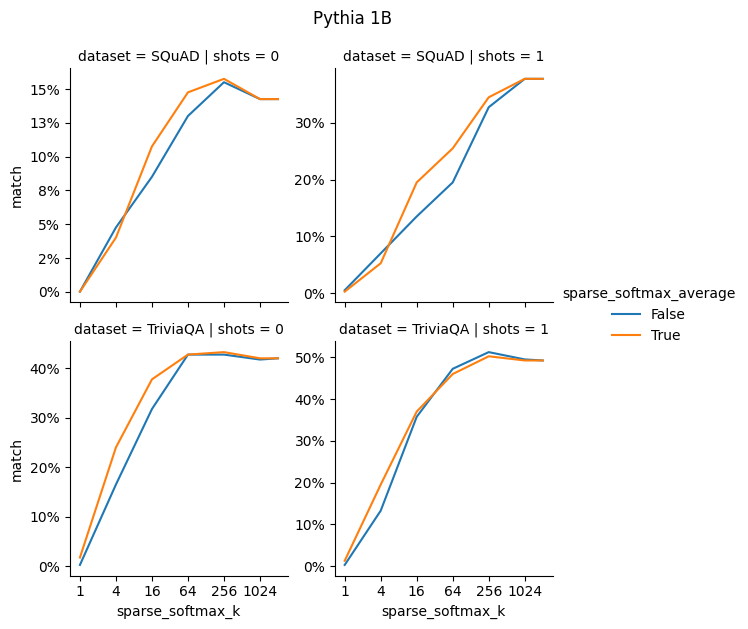

In [4]:
g = sns.relplot(
    data=df.fillna(dict(sparse_softmax_k=2048)).pipe(lambda d: d[d.model_scale=="1b"]),
    y="match", x="sparse_softmax_k", row="dataset", col="shots", hue="sparse_softmax_average", kind="line",
    facet_kws=dict(sharey=False), height=3)
for ax in g.axes.flatten():
    ax.set_xscale("log", base=2)
    ax.set_xticks([2**n for n in range(0, 11, 2)])
    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0%}"))
plt.suptitle("Pythia 1B", y=1.04);

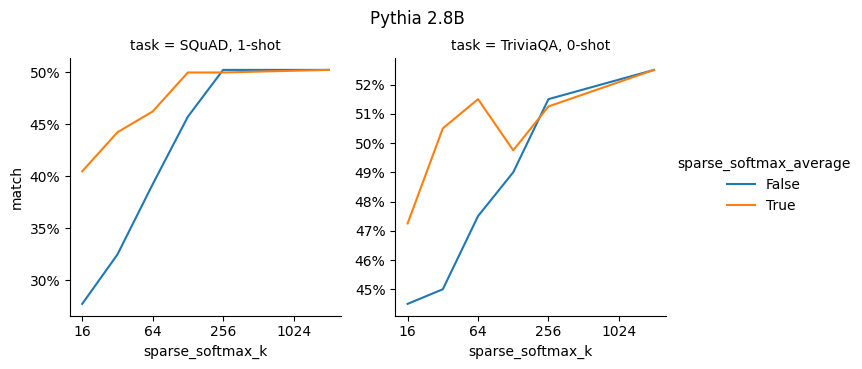

In [5]:
g = sns.relplot(
    data=df.fillna(dict(sparse_softmax_k=2048))
    .pipe(lambda d: d[d.model_scale=="2.8b"])
    .pipe(lambda d: d.assign(task=d.apply(lambda s: f"{s.dataset}, {s.shots}-shot", axis=1))),
    y="match", x="sparse_softmax_k", col="task", hue="sparse_softmax_average", kind="line",
    facet_kws=dict(sharey=False), height=3.5)
for ax in g.axes.flatten():
    ax.set_xscale("log", base=2)
    ax.set_xticks([2**n for n in range(4, 11, 2)])
    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0%}"))
plt.suptitle("Pythia 2.8B", y=1.04);